<a href="https://colab.research.google.com/github/sbmshukla/ML-Notebook-Quick-Saved/blob/main/KindleReview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Best Practices

- Preprocessing & Cleaning
- Train Test Split
- BOW, TFIDF, Word2Vec
- Train ML Algo

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('all_kindle_review.csv', encoding='latin-1')

In [4]:
df.head(2)

,Unnamed: 0.1,Unnamed: 0,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,11539,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600
1,1,5957,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400


In [5]:
data = df[['reviewText', 'rating']]

In [6]:
data.head()

,reviewText,rating
0,"Jace Rankin may be short, but he's nothing to ...",3
1,Great short read. I didn't want to put it dow...,5
2,I'll start by saying this is the first of four...,3
3,Aggie is Angela Lansbury who carries pocketboo...,3
4,I did not expect this type of book to be in li...,4


In [7]:
data.shape

(12000, 2)

In [8]:
data.isnull().sum()

,0
reviewText,0
rating,0


In [9]:
data['rating'].unique()

array([3, 5, 4, 2, 1])

<Axes: xlabel='rating'>

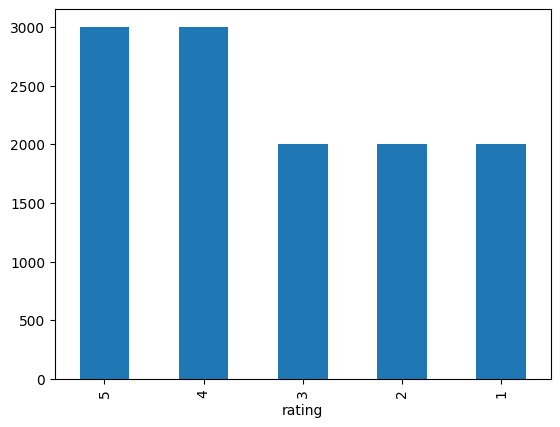

In [10]:
data['rating'].value_counts().plot(kind='bar')

In [11]:
## Preprocesing & Checking

In [12]:
data['rating'] = data['rating'].apply(lambda x: 1 if x > 3 else 0)

/tmp/ipython-input-2701074676.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rating'] = data['rating'].apply(lambda x: 1 if x > 3 else 0)


In [13]:
data.head()

,reviewText,rating
0,"Jace Rankin may be short, but he's nothing to ...",0
1,Great short read. I didn't want to put it dow...,1
2,I'll start by saying this is the first of four...,0
3,Aggie is Angela Lansbury who carries pocketboo...,0
4,I did not expect this type of book to be in li...,1


In [14]:
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer

In [15]:
data['reviewText'] = data['reviewText'].str.lower()

/tmp/ipython-input-1610592959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['reviewText'] = data['reviewText'].str.lower()


In [16]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [17]:
def textPreprocessing(text: str) -> str:
    # 1. remove URLs
    text = re.sub(r'(?:https?|ftp|ssh)://\S+', ' ', text)

    # 2. remove HTML tags
    text = re.sub(r'<.*?>', ' ', text)

    # 3. keep only letters/numbers
    text = re.sub(r'[^a-zA-Z0-9]+', ' ', text)

    # 4. lowercase & tokenize
    tokens = text.lower().split()

    # 5. remove stopwords
    tokens = [word for word in tokens if word not in set(stopwords.words('english'))]

    # 6. join back into string
    return ' '.join(tokens)

In [18]:
data['reviewText'] = data['reviewText'].apply(textPreprocessing)

/tmp/ipython-input-58536637.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['reviewText'] = data['reviewText'].apply(textPreprocessing)


In [19]:
data.head()

,reviewText,rating
0,jace rankin may short nothing mess man hauled ...,0
1,great short read want put read one sitting sex...,1
2,start saying first four books expecting 34 con...,0
3,aggie angela lansbury carries pocketbooks inst...,0
4,expect type book library pleased find price right,1


In [20]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [21]:
def lemmatize_text(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

In [22]:
data['reviewText'] = data['reviewText'].apply(lemmatize_text)

/tmp/ipython-input-1743239686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['reviewText'] = data['reviewText'].apply(lemmatize_text)


In [23]:
data.head()

,reviewText,rating
0,jace rankin may short nothing mess man hauled ...,0
1,great short read want put read one sitting sex...,1
2,start saying first four book expecting 34 conc...,0
3,aggie angela lansbury carry pocketbook instead...,0
4,expect type book library pleased find price right,1


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = data['reviewText']
y = data['rating']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [27]:
print(X_train.shape, X_test.shape)

(9600,) (2400,)


In [28]:
# Lets Do Vectorization

In [29]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [47]:
bow = CountVectorizer(ngram_range=(2,3), max_features=5000)
X_train_bow = bow.fit_transform(X_train).toarray()
X_test_bow = bow.transform(X_test).toarray()

In [49]:
tfidf = TfidfVectorizer(ngram_range = (2, 3), max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train).toarray()
X_test_tfidf = tfidf.transform(X_test).toarray()

In [50]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [43]:
# BOW

In [44]:
model_gb_ = GaussianNB()
model_gb_.fit(X_train_bow, y_train)

GaussianNB()

In [51]:
model_tfidf = GaussianNB()
model_tfidf.fit(X_train_tfidf, y_train)

GaussianNB()

In [52]:
y_pred_bow = model_gb_.predict(X_test_bow)
y_pred_tfidf = model_tfidf.predict(X_test_tfidf)

In [53]:
print(f"BOW Prediction: {accuracy_score(y_test, y_pred_bow)}")
print(f"TFIDF Prediction: {accuracy_score(y_test, y_pred_tfidf)}")

BOW Prediction: 0.5179166666666667
TFIDF Prediction: 0.7354166666666667


# Now Lets Do Hyper Parameter Tunning

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

In [59]:
pipeline_bow = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('to_dense', FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)),
    ('classifier', GaussianNB())
])
grid_bow = {
    'vectorizer__ngram_range': [(1, 1), (1, 2), (1,3)],
    'vectorizer__max_features': [3000, 5000, 7000, 9000],
    'vectorizer__min_df': [1, 3, 5, None]
    }
grid_search_bow = GridSearchCV(pipeline_bow, grid_bow, cv=5)
grid_search_bow.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py", line 654, in fit
    Xt = self._fit(X, y, routed_params, 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer', CountVectorizer()),
                                       ('to_dense',
                                        FunctionTransformer(accept_sparse=True,
                                                            func=<function <lambda> at 0x7dccf2cfae80>)),
                                       ('classifier', GaussianNB())]),
             param_grid={'vectorizer__max_features': [3000, 5000, 7000, 9000],
                         'vectorizer__min_df': [1, 3, 5, None],
                         'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)]})

In [60]:
print(f"Best Params: {grid_search_bow.best_params_}")
print(f"Best Score: {grid_search_bow.best_score_}")
model_bow = grid_search_bow.best_estimator_

y_pred_bow = model_bow.predict(X_test)
print(f"BOW Prediction: {accuracy_score(y_test, y_pred_bow)}")

Best Params: {'vectorizer__max_features': 9000, 'vectorizer__min_df': 5, 'vectorizer__ngram_range': (1, 2)}
Best Score: 0.7603125
BOW Prediction: 0.73625


In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  RandomizedSearchCV

In [68]:
pipeline_bow = Pipeline([
    ('vectorizer', CountVectorizer(max_features=9000, min_df=5, ngram_range=(1,2))),
    ('to_dense', FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)),
    ('classifier', RandomForestClassifier())
])

grid_bow = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30]
    }
random_search_bow_rfr = RandomizedSearchCV(pipeline_bow, grid_bow, cv=5, n_iter=10)
random_search_bow_rfr.fit(X_train, y_train)

KeyboardInterrupt: 

In [64]:
print(f"Best Params: {random_search_bow_rfr.best_params_}")
print(f"Best Score: {random_search_bow_rfr.best_score_}")
model_bow_rfr = random_search_bow_rfr.best_estimator_
y_pred_bow_rfr = model_bow_rfr.predict(X_test)
print(f"BOW Prediction: {accuracy_score(y_test, y_pred_bow)}")

BOW Prediction: 0.8025


In [ ]:
import gensim
from gensim.models import Word2Vec, KeyedVectors
from gensim.utils import simple_preprocess



pipeline_bow = Pipeline([
    ('vectorizer', Word2Vec(sentences=X_train.toarray(), min_df=5, ngram_range=(1,2))),
    ('to_dense', FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)),
    ('classifier', RandomForestClassifier())
])

In [ ]:
X_train